In [1]:
import scipy
import scipy.stats as sps
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
X = sps.norm # задаем нормальное распределение

In [4]:
X.rvs(size= 10) # задаем выборку

array([ 1.25946802,  2.41236806, -0.10346705,  0.53017204,  0.65717042,
       -0.30399382, -0.38609067, -0.04456768,  0.39009793,  0.5126728 ])

In [6]:
X.cdf(-1) # значение функции распеределения в заданной точке значения

0.15865525393145707

In [7]:
X.logcdf(0) # значение логарифма функции распеределения в заданной точке значения

-0.6931471805599453

In [8]:
X.ppf(0.5) # значение квантиля

0.0

In [9]:
X.mean() # значение математичемкого ожидания

0.0

In [10]:
X.median() # значение медианы

0.0

In [11]:
X.var() # значение дисперсии

1.0

In [13]:
#-------------------- Реализация нормального распределения -------------------------------------
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print(sample[:10]) # первые 10 значений выборки
print(sample.mean()) # выборочная средняя
print(sample.var()) # выборочная дисперсия

[ 0.88263559 -4.86986227 -4.39896177  1.29944916  3.38004185  1.13678381
 -4.80636885  3.80307664 -0.27656787 -0.59256474]
0.9757566354219728
7.878737771290701


In [15]:
print(sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3])) # плотность
print(sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3])) # функция распределения
print(sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95])) # квантиль

[0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
[0.25249254 0.36944134 0.5        0.63055866 0.74750746]
[-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


In [16]:
#-------------------- Реализация бинарного распределения -------------------------------------
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print(sample[:10]) # первые 10 значений выборки
print(sample.mean()) # выборочная средняя
print(sample.var()) # выборочная дисперсия

[6 9 7 9 4 5 5 6 5 6]
5.88
2.2756


In [17]:
print(sps.binom(n=10, p=0.6).pmf([-1, 0, 1, 2, 3])) # плотность
print(sps.binom(n=10, p=0.6).cdf([-1, 0, 1, 2, 3])) # функция распределения
print(sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95])) # квантиль

[0.         0.00010486 0.00157286 0.01061683 0.04246733]
[0.         0.00010486 0.00167772 0.01229455 0.05476188]
[3. 4. 6. 8. 8.]


In [18]:
#-------------------- Реализация многомерного нормального распределения -------------------------------------
sample = sps.multivariate_normal(mean=[1, 1], cov=[[2, 1], [1, 2]]).rvs(size=200)
print(sample[:10]) # первые 10 значений выборки
print(sample.mean(axis=0)) # выборочная средняя
print(np.cov(sample.T)) # выборочная матрица ковариацией

[[ 0.28222237  1.39209811]
 [ 0.39788225  1.02023193]
 [ 1.53860448  0.2339394 ]
 [ 2.6233499   2.139902  ]
 [ 0.56685194 -0.70173994]
 [ 0.24084213 -0.02194385]
 [-0.60960669  0.59860074]
 [ 0.68502039  2.57205683]
 [ 1.02648183 -0.5154863 ]
 [-0.42625557  0.31789529]]
[0.90813686 1.08295249]
[[1.90918053 1.06237902]
 [1.06237902 2.15066108]]


In [21]:
#-------------------- Создание собственного распределения -------------------------------------
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4*x**3/15

cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print(sample[:10]) # первые 10 значений выборки
print(sample.mean(axis=0)) # выборочная средняя
print(np.cov(sample.T)) # выборочная матрица ковариацией

[1.65235082 1.76946926 1.9565558  1.95163923 1.86571605 1.79145362
 1.74975749 1.84663045 1.50726787 1.20978754]
1.6578002355395218
0.07342575115479862


In [2]:
#-------------------- Линейная реграссия -------------------------------------
sales = pd.read_csv('sales_train_V2.csv')
sales59 = sales[sales.shop_id==59]
sales59.date = pd.to_datetime(sales59.date, dayfirst=True)
sales59.set_index('date', inplace=True)
sales59 = sales59.drop(columns=['date_block_num', 'item_id'])
sales59['income'] = sales59['item_price'] * sales59['item_cnt_day']

sales59 = sales59[sales59.index.year == 2013]

C:\Users\and_b\AppData\Local\Temp\ipykernel_7708\1353012355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales59.date = pd.to_datetime(sales59.date, dayfirst=True)


In [29]:
sales59_historic = sales59[sales59.index.month < 10]
sales59_to_predict = sales59[sales59.index.month == 10]

In [30]:
sales59_historic = sales59_historic.sort_values(by= 'date')
sales59_to_predict = sales59_to_predict.sort_values(by= 'date')

In [34]:
sales59_historic['INC'] = sales59_historic.income.cumsum()

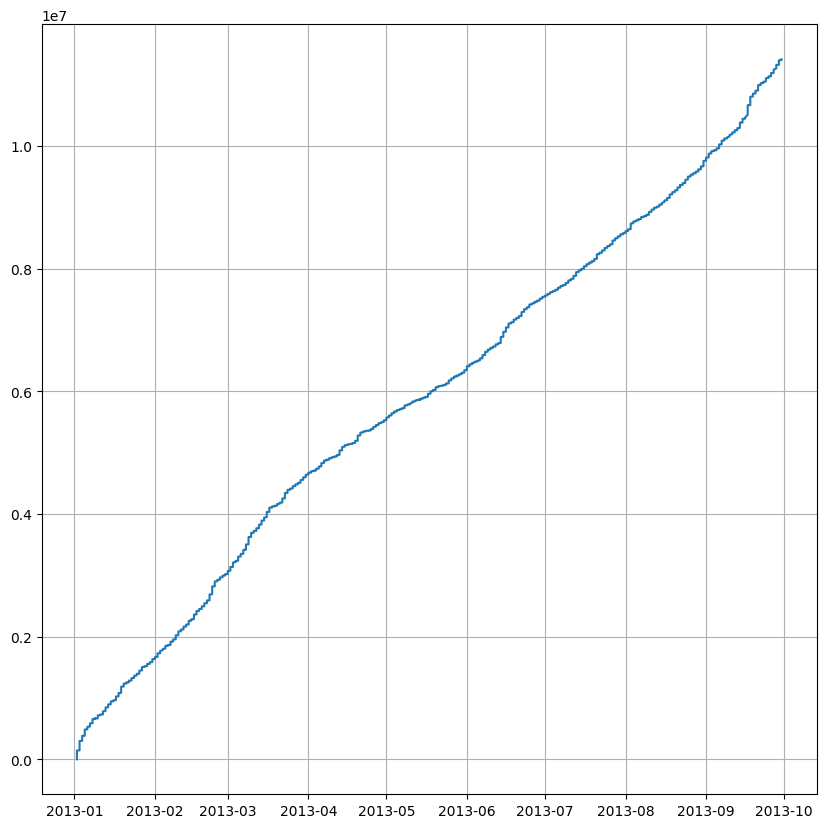

In [39]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(sales59_historic.index, sales59_historic.INC)

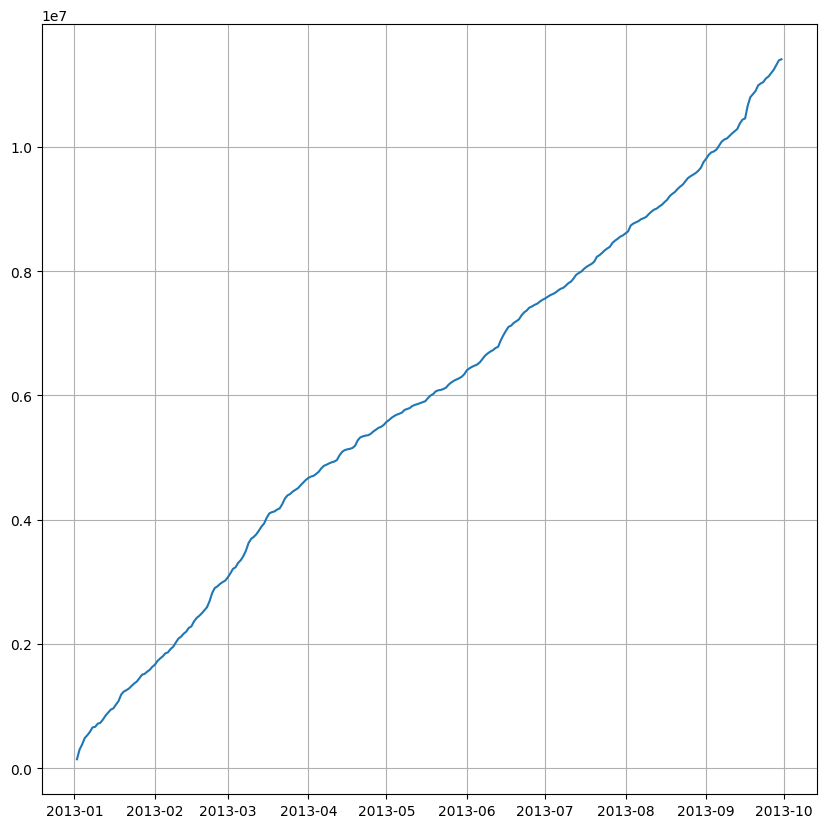

In [38]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(sales59_historic.INC.resample('1D').agg('last'))

In [43]:
month_income = [sales59_historic['income'][sales59_historic.index.month == i].sum() for i in range(1, 11)]

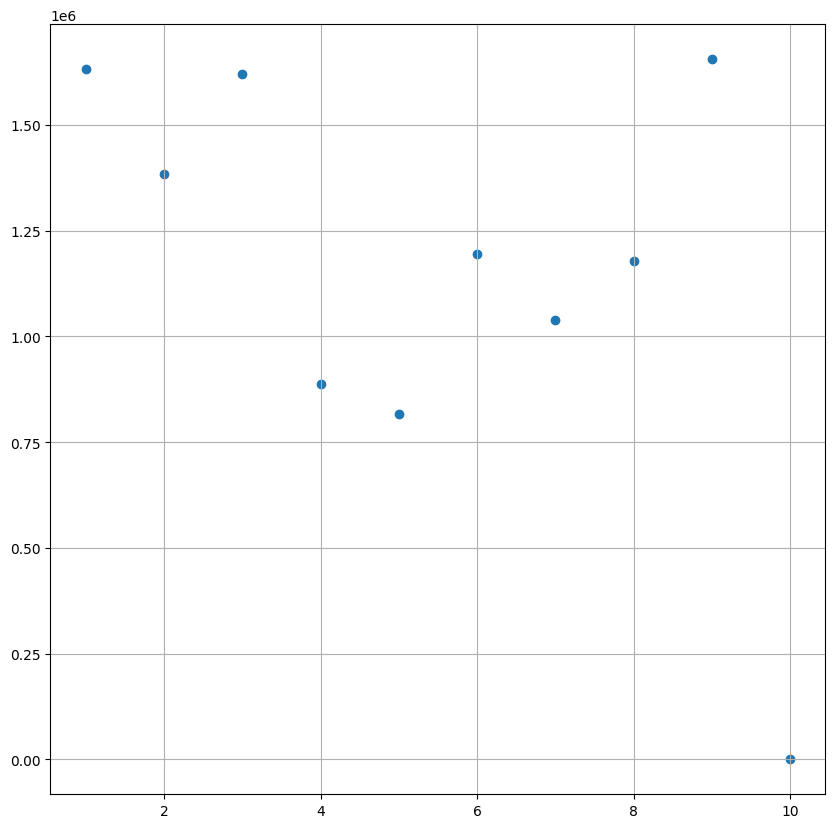

In [47]:
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(np.arange(1, 11),month_income)

In [48]:
result = scipy.stats.linregress(x = np.arange(272), y = sales59_historic.INC.resample('1D').agg('last'))

In [50]:
k = result.slope
b = result.intercept

In [51]:
day = 272+31
prediction = k * day + b

In [52]:
prediction

12267080.376714047

In [53]:
prediction_income = prediction - sales59_historic.INC[-1]

In [54]:
prediction_income

855272.7867138777

In [55]:
#---------------сравним с реальностью -----------------------------------
real_income = sales59_to_predict.income.sum()
real_income - prediction_income

549329.2132861223

In [56]:
#------------------- относительная пограшность ----------------------
(real_income - prediction_income)/real_income

0.39109243279314876

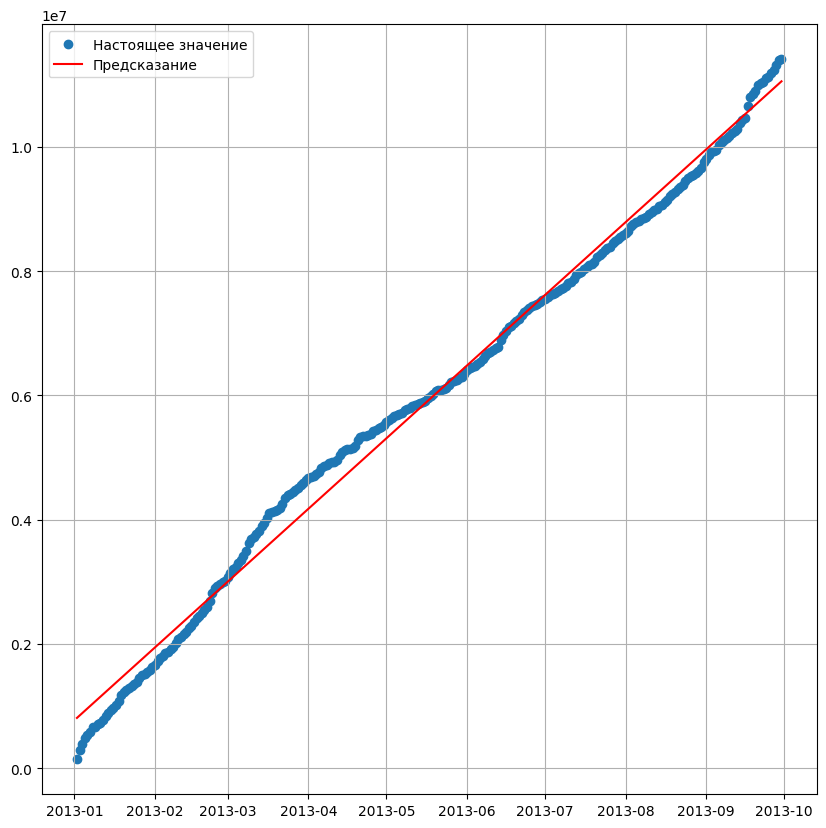

In [61]:
plt.figure(figsize=(10, 10))
plt.grid()

X = sales59_historic.index.unique()
Y = sales59_historic.INC.resample('1D').agg('last')
preds = k*np.arange(272)+b

plt.scatter(X,Y, label='Настоящее значение')
plt.plot(X, preds, c='r', label='Предсказание')
plt.legend()

